# Video Game Sales Forecasting
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 

### Import packages and data file

In [1]:
#import packages and libraries needed
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv('C:/Users/susan/Documents/TripleTen/video_game_sales/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.shape

(16715, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Prepare the data

<b>Replace column names with lowercase letters

In [6]:
df = df.rename(columns=str.lower)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Handle missing values.<b>
    
Critic_score and user_score cannot be determined, so we will leave those missing values. The empty ratings values are filled with 'undefined' since we don't have the ratings for those rows. NaN values for year_of_release will be dropped since they make up about 1% of the data. Rows with empty values in the name and genre columns will also be dropped because they do not consist of a significant percentage of the data.

In [7]:
df['rating'] = df['rating'].fillna('undefined')

In [8]:
df.isna().mean()*100


name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating              0.000000
dtype: float64

In [9]:
#Since there are only 1.6% of rows in the year_of_release column that are missing data, I will drop those rows along with the missing values in the name and genre columns
df= df.dropna(subset=['year_of_release', 'name', 'genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
#change the 'user_score' column to a numeric data type
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#change 'year_of_release' column to be an integer instead of float data type
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<b>Check for duplicates.

In [11]:
duplicate = df[df.duplicated()]
duplicate

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<b>Add a column for the total sales in all regions for each game.

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Analyze the data

<b>How many games were released in different years? Is the data for every period significant?

In [20]:
games_released = df['year_of_release'].value_counts().sort_index().reset_index()
games_fig = px.bar(games_released, x='year_of_release', y='count', title='Number of Games Released by Year', labels={'year_of_release': 'Year Released', 'count': 'Number of Games'})
games_fig.show()

Game sales appear to have peaked in 2008-2009. It also appears that the number of games released before 1995 is not significant, so we will filter out the data from before that time.



In [21]:
df = df.loc[df['year_of_release'] >= 1995, :]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15958 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15958 non-null  object 
 1   platform         15958 non-null  object 
 2   year_of_release  15958 non-null  int32  
 3   genre            15958 non-null  object 
 4   na_sales         15958 non-null  float64
 5   eu_sales         15958 non-null  float64
 6   jp_sales         15958 non-null  float64
 7   other_sales      15958 non-null  float64
 8   critic_score     7979 non-null   float64
 9   user_score       7459 non-null   float64
 10  rating           15958 non-null  object 
 11  total_sales      15958 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


<b>How do sales vary between platforms?

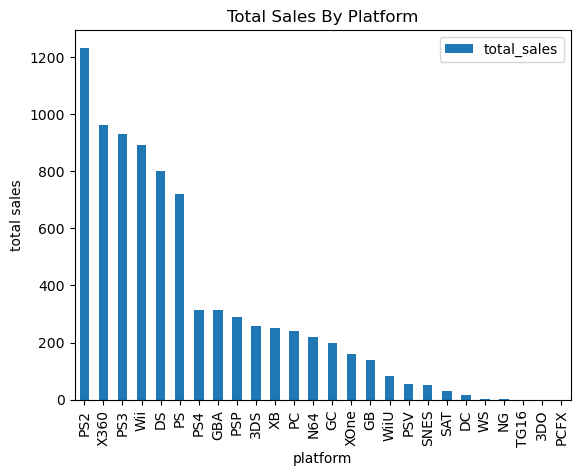

In [22]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales.plot(kind='bar', x='platform', y='total_sales', title='Total Sales By Platform', ylabel='total sales')
plt.show()

We can see from the plot that the PS2, X360, PS3, Wii, DS, and PS have a significantly higher number of sales than all other platforms. However, we can calcuate which of these are in the top 25% of platforms for more accuracy. Then, we can look at the total sales of these top platforms over time.

In [23]:
top_percentage = 0.25
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
num_top_platforms = int(len(platform_sales) * top_percentage)
top_platforms = platform_sales.head(num_top_platforms).index
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

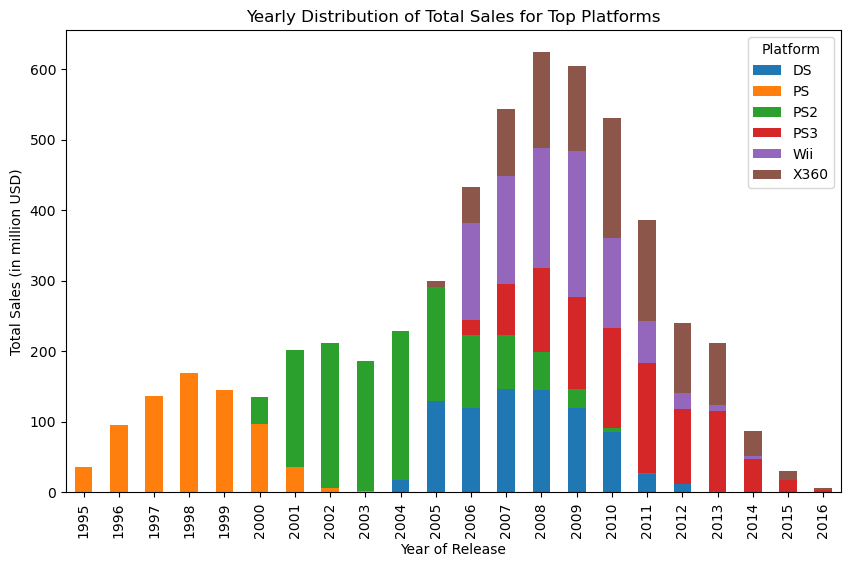

In [24]:
platform_data = df[df['platform'].isin(top_platforms)]

platform_data_yearly = platform_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

platform_data_yearly.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in million USD)')
plt.title('Yearly Distribution of Total Sales for Top Platforms')
plt.legend(title='Platform')
plt.show()


We can see that after the PS2 was introduced in 2000, sales for the PS declined. This also happened to the PS2 when the DS was introduced. Sales for different platforms tend to last around 10 years, which sugggests that the gaming industry shifts rather quickly as new games are introduced.

<b>Find platforms that used to be popular but now have zero sales. 

In [25]:
#identify popular platforms, those that have over 10 in total sales
popular_sales_threshold = 10
pop_platforms = df[df['total_sales'] > popular_sales_threshold]['platform'].unique()

#define most recent years
recent_years = [2011, 2012, 2013, 2014, 2015, 2016]
#filter data to only include recent years
recent_data = df[df['year_of_release'].isin(recent_years)]
#group and sum total sales
recent_sales = recent_data.groupby('platform')['total_sales'].sum()
#find platforms with zero sales in recent years
zero_sales = recent_sales[recent_sales < 1].index
#find popular platforms with zero sales now
popular_zero_sales = [platform for platform in pop_platforms if platform in zero_sales]

print("Popular platforms with zero sales now:", popular_zero_sales)

Popular platforms with zero sales now: ['PS2']


In [26]:
modern_platforms = df.loc[df['year_of_release'] >= 2011, :]

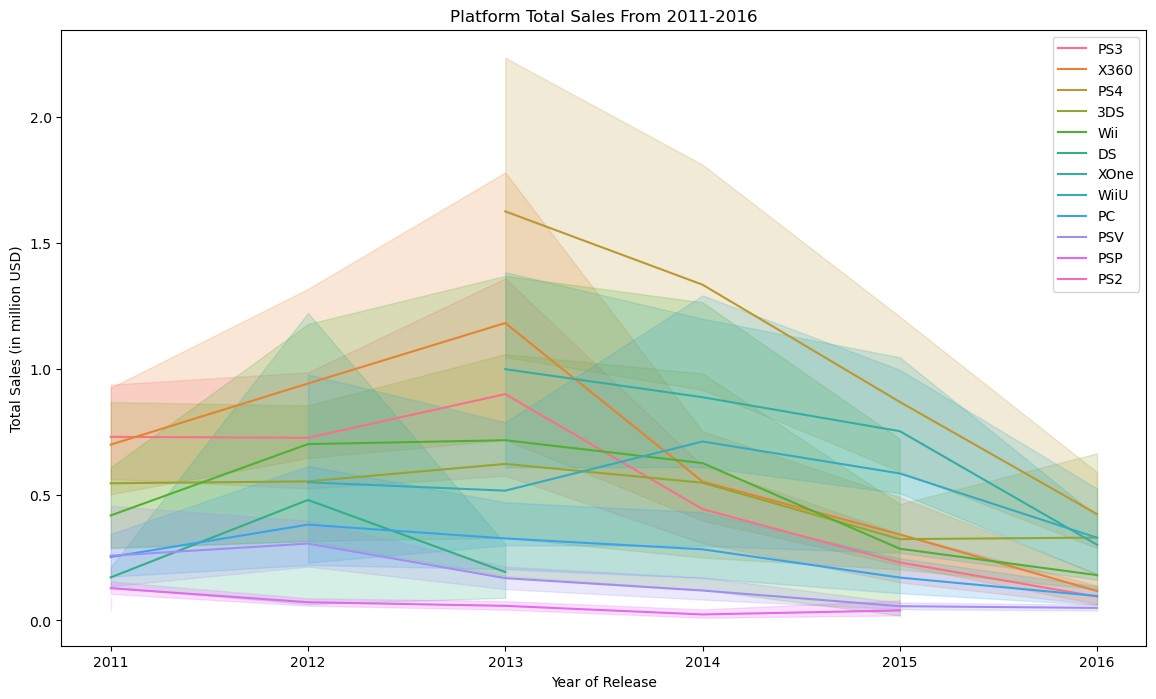

In [27]:
plt.figure(figsize=(14,8))
sns.lineplot(data=modern_platforms, x='year_of_release', y='total_sales', hue='platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in million USD)')
plt.title('Platform Total Sales From 2011-2016')
plt.legend()
plt.show()


It appears that most gaming platforms have declined in sales since 2014, although 3DS appears to have made an increase in sales from 2015 to 2016. I also wonder how many games have been released in the last few years. If the market has been saturated with lots of new games, perhaps that would be one reason for none of the platforms having a strong sales trend.

In [28]:
game_3ds = modern_platforms[modern_platforms['platform'] == '3DS']
game_3ds = game_3ds['year_of_release'].value_counts().sort_index()
game_3ds

year_of_release
2011    116
2012     93
2013     91
2014     80
2015     86
2016     46
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of 3DS Games Released by Year')

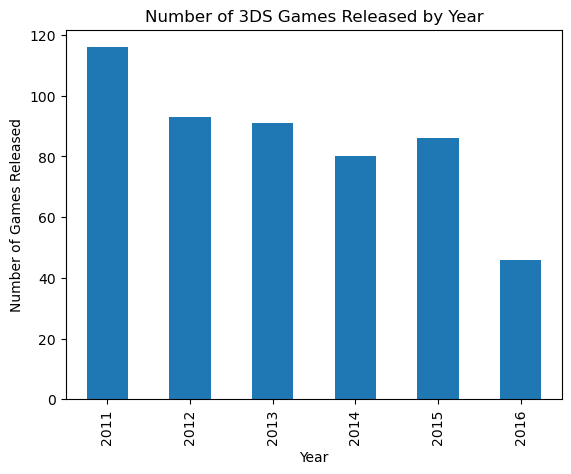

In [29]:
game_3ds.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of 3DS Games Released by Year')

In [30]:
#Filter the data to include years 2014 and later
latest_years = df.loc[df['year_of_release'] >= 2014, :]
latest_years.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98


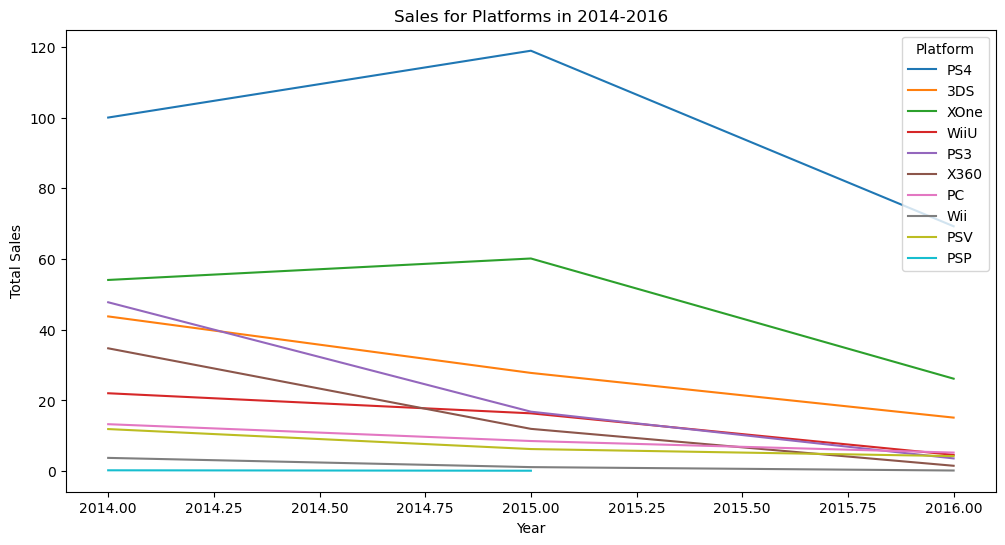

In [31]:
#Create list of platforms
plat_names = latest_years['platform'].unique()
#aggregate sales by year
aggregated_data = latest_years.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
#Create a plot
plt.figure(figsize=(12,6))
#Loop through each platform and plot its data
for platform in plat_names:
    platform_fig_data = aggregated_data[aggregated_data['platform'] == platform]
    plt.plot(platform_fig_data['year_of_release'], platform_fig_data['total_sales'], label=platform)
    
plt.title('Sales for Platforms in 2014-2016')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.show()

No new games appear in the 2015 data that did not appear with sales in 2014. PS4, XOne, and 3DS hold the top number of sales for the latest two years.

<b>Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms?

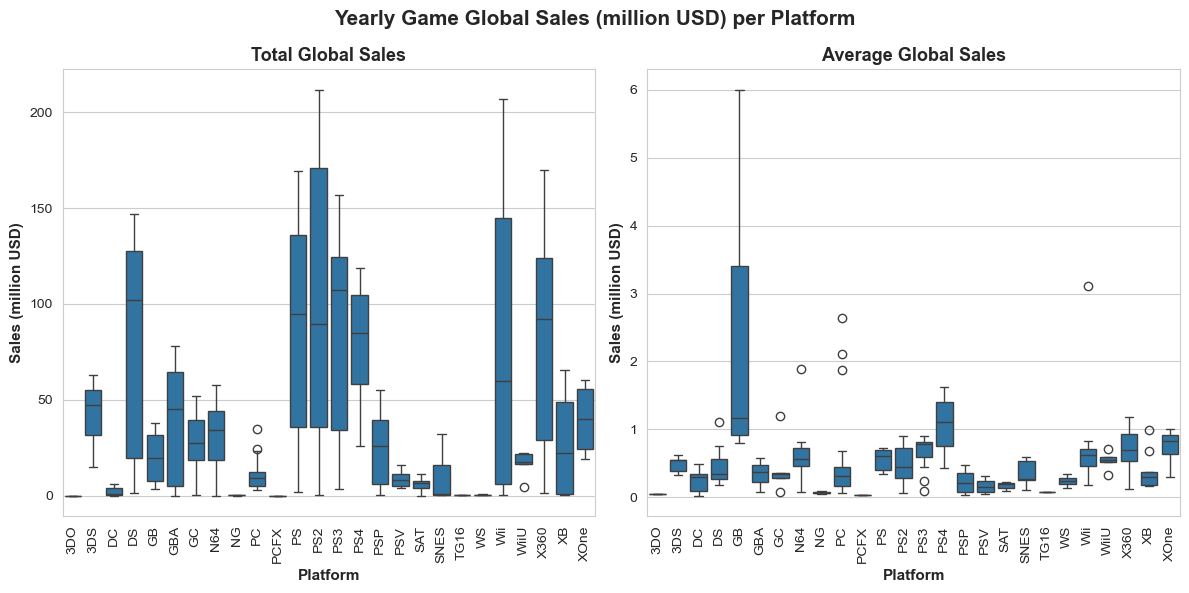

In [32]:
game_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].agg(['sum', 'mean']).reset_index()
game_sales.columns = ['platform', 'year', 'yearly_sales', 'yearly_avg_sales']

sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=game_sales, x='platform', y='yearly_sales', ax=ax1)
sns.boxplot(data=game_sales, x='platform', y='yearly_avg_sales', ax=ax2)

fig.suptitle('Yearly Game Global Sales (million USD) per Platform', fontsize=15, fontweight='bold')

ax1.set_title('Total Global Sales', fontsize=13, fontweight='bold')
ax1.set_xlabel('Platform', fontsize=11, fontweight='bold')
ax1.set_ylabel('Sales (million USD)', fontsize=11, fontweight='bold')
plt.setp(ax1.get_xticklabels(), rotation=90)

ax2.set_title('Average Global Sales', fontsize=13, fontweight='bold')
ax2.set_xlabel('Platform', fontsize=11, fontweight='bold')
ax2.set_ylabel('Sales (million USD)', fontsize=11, fontweight='bold')
plt.setp(ax2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

There is a significant difference in sales between platforms. The top 6 performing platforms all have a median of close to 100 million in sales. When looking at the averages sales data, GB and PS4 stand out the most as having the highest average sales.

<b>Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Text(0.5, 1.0, 'Relationship Between Professional Reviews and Total Sales of PS4')

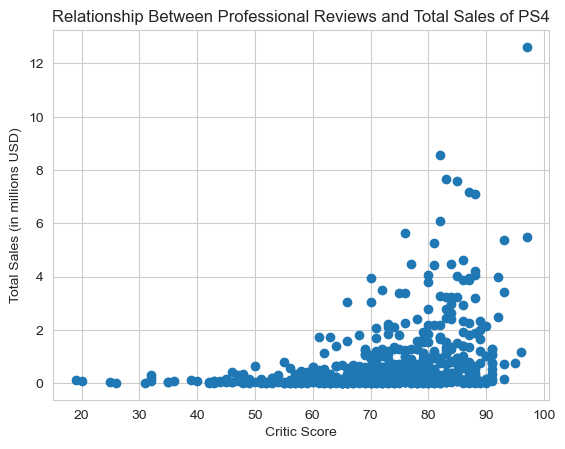

In [33]:
#Filter the data to inlcude only the PS4 platform
df_ps4 = latest_years[latest_years['platform'] == 'PS4']
#Filter out the rows with no critic or user score given
df_ps4 = latest_years.dropna()

#Create a scatterplot for critic score vs sales
plt.scatter(x=df_ps4['critic_score'], y=df_ps4['total_sales'])
plt.ylabel('Total Sales (in millions USD)')
plt.xlabel('Critic Score')
plt.title('Relationship Between Professional Reviews and Total Sales of PS4')


Text(0.5, 1.0, 'Relationship Between User Reviews and Total Sales of PS4')

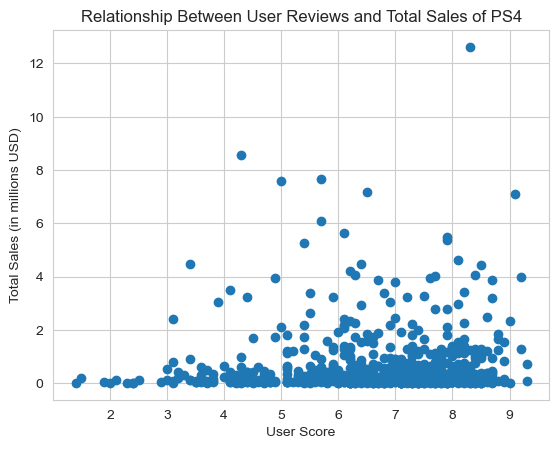

In [34]:
#Create a scatterplot for user score vs sales
plt.scatter(x=df_ps4['user_score'], y=df_ps4['total_sales'])
plt.ylabel('Total Sales (in millions USD)')
plt.xlabel('User Score')
plt.title('Relationship Between User Reviews and Total Sales of PS4')

In [35]:
#Calculate the correlation between critic_score and total_sales of the X360
corr_critic_ps4 = df_ps4['critic_score'].corr(df_ps4['total_sales'])
corr_user_ps4 = df_ps4['user_score'].corr(df_ps4['total_sales'])
print(f"Correlation between Critic Score and Total Sales for the PS4: {corr_critic_ps4}")
print(f"Correlation between User Score and Total Sales for the PS4: {corr_user_ps4}")

Correlation between Critic Score and Total Sales for the PS4: 0.3253626120075885
Correlation between User Score and Total Sales for the PS4: 0.005202258360087506


So we can see a slightly positive correlation between professional reviews and game sales. While it is not a large relationship, it is reasonable to suggest that the higher the reviews given the greater impact there will be on sales. User reviews do not seem to have a significant correlation with total sales.

<b>Compare the sales of the same games on other platforms.

In [37]:
#Filter the data for those rows that have a critic or user score
games_by_platform = latest_years.dropna()
#Count unique platforms
games = games_by_platform.groupby('name').platform.nunique().reset_index()
#Filter games that appear on more than one platform
multi_platform_games = games[games.platform > 1]
#Select game names that are in the filtered list
multi_platform_names = multi_platform_games['name']
#Join with the original dataframe to get platform names
result = games_by_platform[games_by_platform['name'].isin(multi_platform_names)]
#group by name and platform to aggregate scores and sales
comparison = result.groupby(['name', 'platform'])[['user_score', 'critic_score', 'total_sales']].mean().reset_index()

#to specifically compare sales of the same games across different platforms
game_pivot = comparison.pivot_table(index='name', columns='platform', values='total_sales')
game_pivot


platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
name,,,,,,,,
2014 FIFA World Cup Brazil,NaN,NaN,0.61,NaN,NaN,NaN,0.43,NaN
7 Days to Die,NaN,NaN,NaN,0.14,NaN,NaN,NaN,0.05
Adventure Time: The Secret of the Nameless Kingdom,0.07,NaN,NaN,NaN,NaN,NaN,0.05,NaN
Agatha Christie's The ABC Murders,NaN,NaN,NaN,0.02,NaN,NaN,NaN,0.01
Alien: Isolation,NaN,0.15,NaN,1.12,NaN,NaN,NaN,0.50
...,...,...,...,...,...,...,...,...
Worms: WMD,NaN,NaN,NaN,0.03,NaN,NaN,NaN,0.01
XCOM 2,NaN,0.23,NaN,0.14,NaN,NaN,NaN,0.04
Yaiba: Ninja Gaiden Z,NaN,NaN,0.10,NaN,NaN,NaN,0.04,NaN


<b>Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

C:\Users\susan\AppData\Local\Temp\ipykernel_13616\2529802135.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Role-Playing'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Platform'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

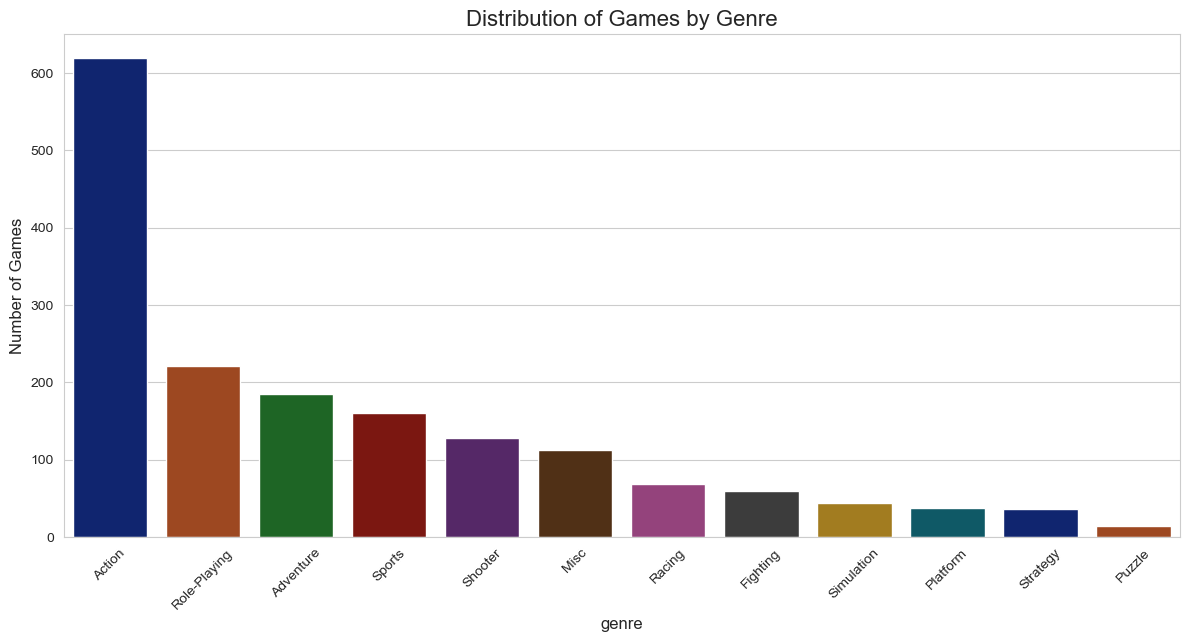

In [38]:
#count the number of games by genre
genre_distribution = latest_years['genre'].value_counts()

#create bar plot for genre distribution
plt.figure(figsize=(12,6))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='dark')
plt.xlabel('genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Distribution of Games by Genre', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)

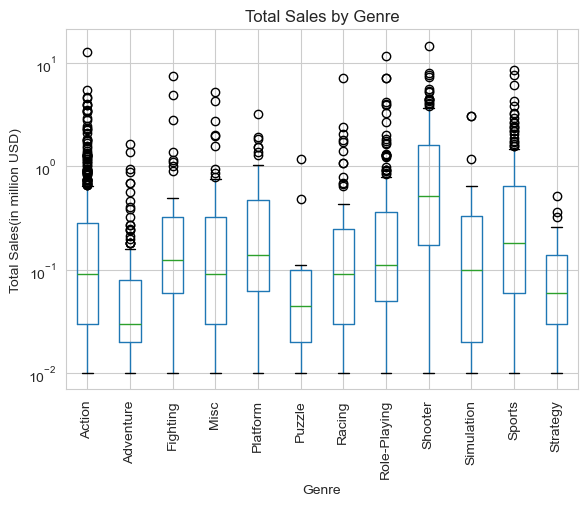

<Figure size 1400x800 with 0 Axes>

In [39]:
#boxplot for total sales by genre
latest_years.boxplot(column='total_sales', by='genre')
plt.title('Total Sales by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Total Sales(in million USD)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.figure(figsize=(14, 8))
plt.show()

It is interesting that Action games have by far the most games released in the last two years. However, Shooter and Sports games have higher sales than Action games. While Puzzles have the least number of games released, sales for this genre are higher than Adventure games, which have the 3rd most games released. From this data, I would conclude that Shooter and Sports games are the most profitable, as they have very high sales even with less amounts of games produced.

### Create a user profile for each region.

<b> Determine the top five platforms and genres for each region. Do ESRB ratings affect sales in individual regions?


In [40]:
#groupy by region and genre
region_genre_sales = latest_years.groupby(['na_sales', 'eu_sales', 'jp_sales', 'genre']).sum().reset_index()

#group by region and platform
region_platform_sales = latest_years.groupby(['na_sales', 'eu_sales', 'jp_sales', 'platform']).sum().reset_index()

#group by region and ratings
region_rating_sales = latest_years.groupby(['na_sales', 'eu_sales', 'jp_sales', 'rating']).sum().reset_index()


In [41]:
#North America top 5 genres
na_genre_sales = region_genre_sales.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print('Top 5 genres in North America:')
display(na_genre_sales.head())

#North America top 5 platforms
na_platform_sales = region_platform_sales.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print('Top 5 platforms in North America:')
display(na_platform_sales.head())

#North America ratings data
na_rating_sales = region_rating_sales.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print('Sales by ESRB ratings in North America:')
display(na_rating_sales)


Top 5 genres in North America:


,genre,na_sales
8,Shooter,78.83
0,Action,69.49
10,Sports,45.89
7,Role-Playing,33.35
3,Misc,14.80


Top 5 platforms in North America:


,platform,na_sales
3,PS4,97.38
9,XOne,79.29
8,X360,26.92
0,3DS,22.45
2,PS3,21.85


Sales by ESRB ratings in North America:


,rating,na_sales
2,M,95.65
4,undefined,63.43
0,E,50.00
3,T,38.33
1,E10+,31.79


In [42]:
#Europe top 5 genres
eu_genre_sales = region_genre_sales.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
print('Top 5 genres in Europe:')
display(eu_genre_sales.head())

#Europe top 5 platforms
eu_platform_sales = region_platform_sales.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
print('Top 5 platforms in Europe:')
display(eu_platform_sales.head())

#Europe ratings data
eu_rating_sales = region_rating_sales.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
print('Sales by ESRB ratings in Europe:')
display(eu_rating_sales)


Top 5 genres in Europe:


,genre,eu_sales
0,Action,70.99
8,Shooter,65.50
10,Sports,45.01
7,Role-Playing,27.87
6,Racing,13.75


Top 5 platforms in Europe:


,platform,eu_sales
3,PS4,128.26
9,XOne,45.13
2,PS3,25.24
0,3DS,15.97
1,PC,15.34


Sales by ESRB ratings in Europe:


,rating,eu_sales
2,M,92.56
4,undefined,57.03
0,E,56.57
3,T,33.25
1,E10+,24.55


In [43]:
#Japan top 5 genres
jp_genre_sales = region_genre_sales.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print('Top 5 genres in Japan:')
display(jp_genre_sales.head())

#Japan top 5 platforms
jp_platform_sales = region_platform_sales.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print('Top 5 platforms in Japan:')
display(jp_platform_sales.head())

#Japan ratings data
jp_rating_sales = region_rating_sales.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print('Sales by ESRB ratings in Japan:')
display(jp_rating_sales)

Top 5 genres in Japan:


,genre,jp_sales
7,Role-Playing,27.57
0,Action,21.30
2,Fighting,6.23
8,Shooter,4.87
3,Misc,4.35


Top 5 platforms in Japan:


,platform,jp_sales
0,3DS,39.92
3,PS4,13.38
2,PS3,8.06
7,WiiU,7.24
5,PSV,7.05


Sales by ESRB ratings in Japan:


,rating,jp_sales
4,undefined,38.07
3,T,13.83
0,E,8.93
2,M,7.94
1,E10+,4.46


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\3159533689.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\3159533689.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\3159533689.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




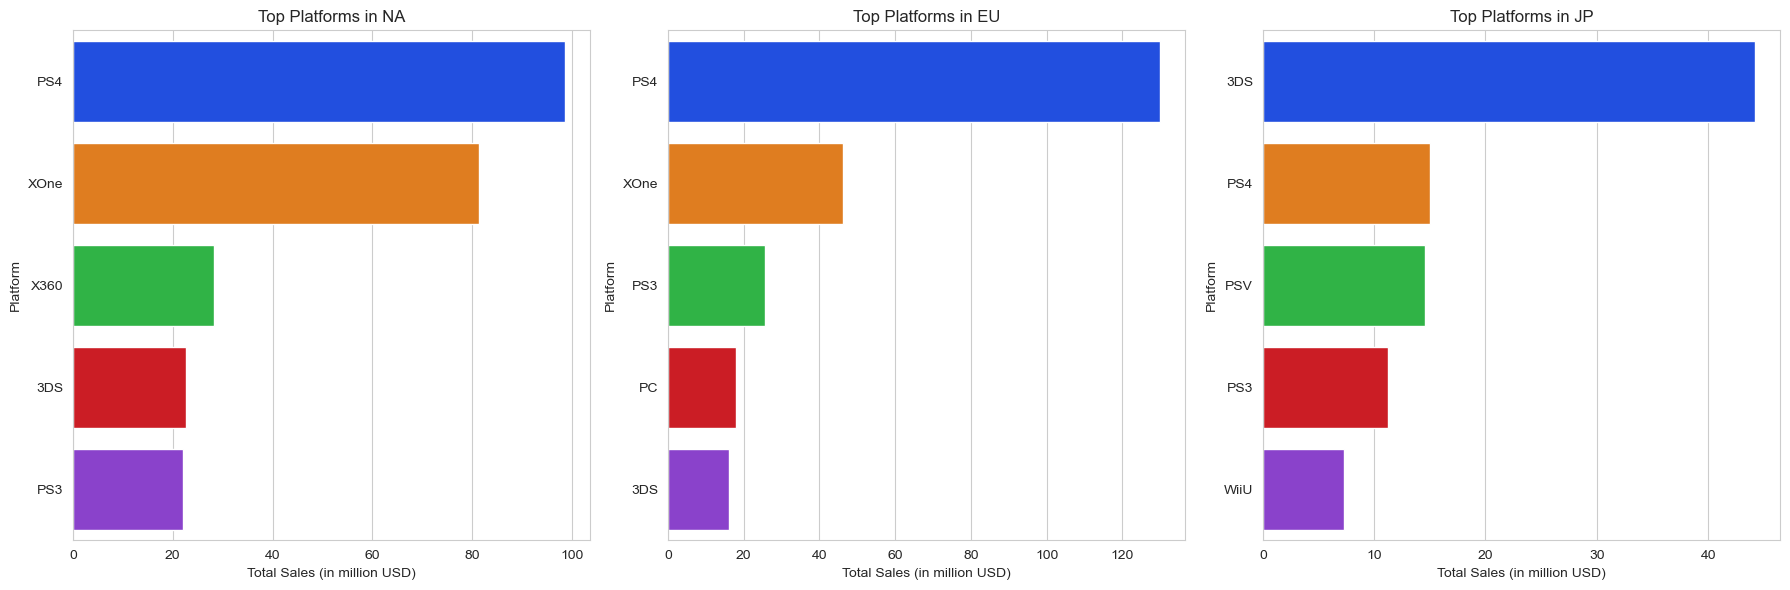

In [44]:
# Calculate sales per platform per region
regions = ['NA', 'EU', 'JP']

# Calculate sales per platform per region
top_platforms_by_region = {}
for region in regions:
    region_column = f'{region.lower()}_sales'
    top_platforms_by_region[region] = latest_years.groupby('platform')[region_column].sum().sort_values(ascending=False).head(5)
    
# Plot top platforms for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for ax, (region, platforms) in zip(axes, top_platforms_by_region.items()):
    sns.barplot(x=platforms.values, y=platforms.index, ax=ax, palette='bright')
    ax.set_title(f'Top Platforms in {region}')
    ax.set_xlabel('Total Sales (in million USD)')
    ax.set_ylabel('Platform')

plt.tight_layout()
plt.show()

PS4 has performed the best across all regions, ranking 1st in NA and EU and 2nd in Japan. The 3DS is the top performing platform in Japan and is also in the top 5 platforms of NA and EU. PS3 is the other platform that made it into the top 5 of all regions.

C:\Users\susan\AppData\Local\Temp\ipykernel_13616\2906419393.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\2906419393.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\2906419393.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




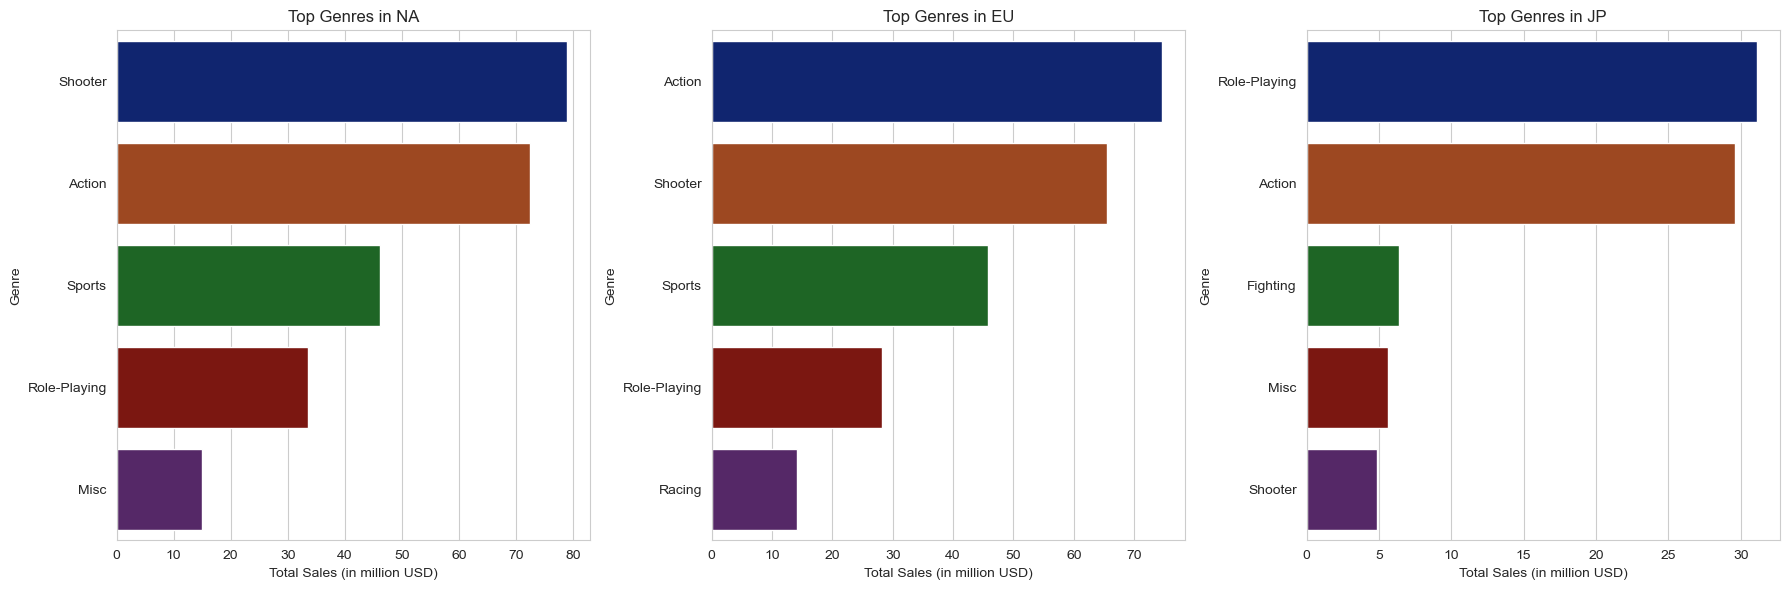

In [45]:
# Calculate sales per genre per region
top_genres_by_region = {}
for region in regions:
    region_column = f'{region.lower()}_sales'
    top_genres_by_region[region] = latest_years.groupby('genre')[region_column].sum().sort_values(ascending=False).head(5)
    
# Plot top genres for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for ax, (region, genres) in zip(axes, top_genres_by_region.items()):
    sns.barplot(x=genres.values, y=genres.index, ax=ax, palette='dark')
    ax.set_title(f'Top Genres in {region}')
    ax.set_xlabel('Total Sales (in million USD)')
    ax.set_ylabel('Genre')

plt.tight_layout()
plt.show()

Action and Shooter genres were the top two performing categories in NA and EU. Japan's top genre was Roleplaying, with Action and Fighting following. Sports is a genre that sold well in NA and EU but did not make the top 5 selling genres in Japan. Sales by genre were very similar between NA and EU, but customers in Japan seem to follow different trends.

C:\Users\susan\AppData\Local\Temp\ipykernel_13616\1274398516.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\1274398516.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\susan\AppData\Local\Temp\ipykernel_13616\1274398516.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




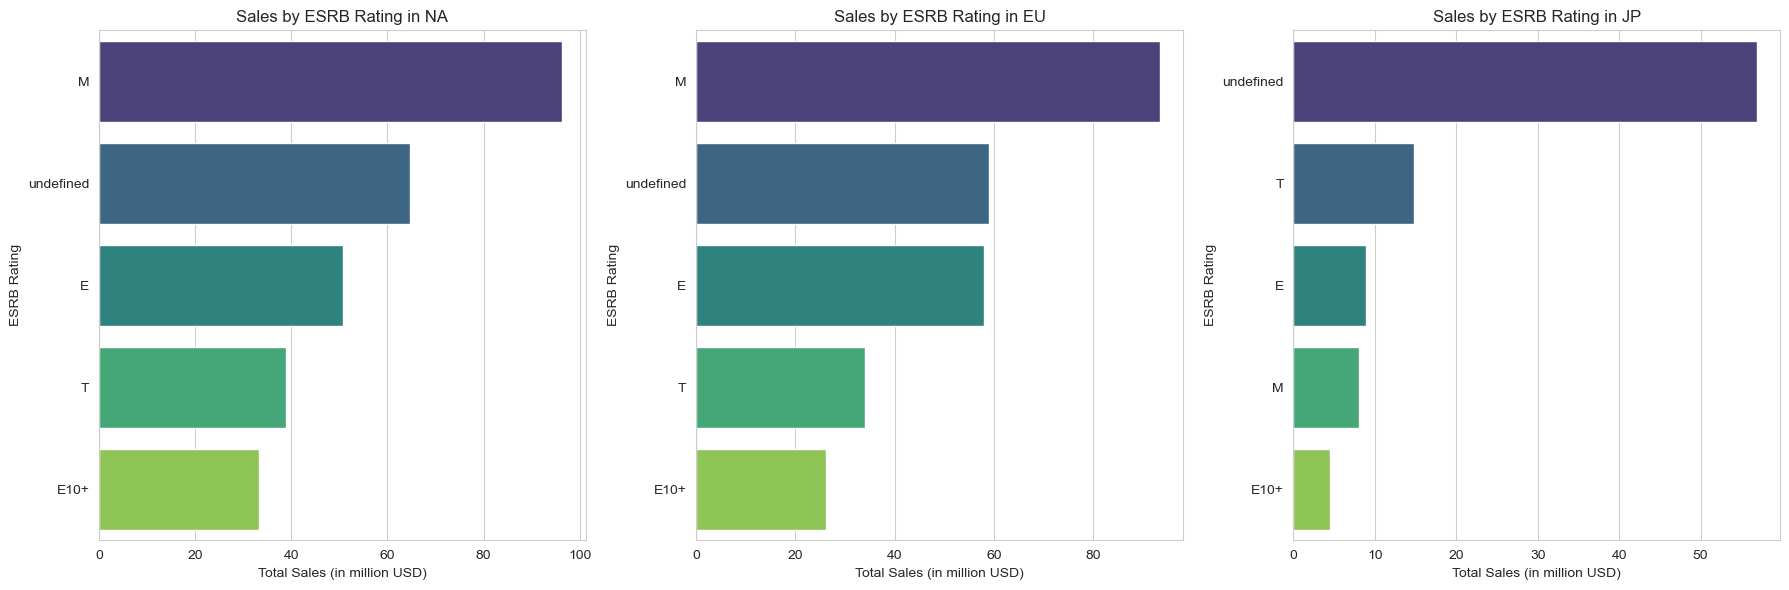

In [46]:
# Calculate sales per ESRB rating per region
sales_by_esrb_rating = {}

for region in regions:
    region_column = f'{region.lower()}_sales'
    sales_by_esrb_rating[region] = latest_years.groupby('rating')[region_column].sum().sort_values(ascending=False)
    
# Plot sales by ESRB rating for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
for ax, (region, ratings) in zip(axes, sales_by_esrb_rating.items()):
    sns.barplot(x=ratings.values, y=ratings.index, ax=ax, palette='viridis')
    ax.set_title(f'Sales by ESRB Rating in {region}')
    ax.set_xlabel('Total Sales (in million USD)')
    ax.set_ylabel('ESRB Rating')

plt.tight_layout()
plt.show()

Sales in North America and Europe performed similarly according to ratings, with M being the rating that sold the most games. However, top sales in Japan were for T and E, with games in the M rating performing much lower.

### Test hypotheses

<b> Null Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

In [47]:
#Filter for user ratings for each platform
xone_ratings = latest_years[latest_years['platform'] == 'XOne']['user_score']
xone_ratings = xone_ratings.dropna()

pc_ratings = latest_years[latest_years['platform'] == 'PC']['user_score']
pc_ratings = pc_ratings.dropna()

#perform ttest
t_stat, p_value = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

#set alpha
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings differ between Xbox One and PC.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings between Xbox One and PC.")

T-statistic: 1.577760647447497
P-value: 0.11601398086668832
Fail to reject the null hypothesis: No significant difference in average user ratings between Xbox One and PC.


<b> Test the null hypothesis: Average user ratings for the Action and Sports genres are the same.

In [48]:
#Filter for user ratings for each platform
action_ratings = latest_years[latest_years['genre'] == 'Action']['user_score']
action_ratings = action_ratings.dropna()

sports_ratings = latest_years[latest_years['genre'] == 'Sports']['user_score']
sports_ratings = sports_ratings.dropna()

t_stat, p_value = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings differ between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user ratings between Action and Sports genres.")

T-statistic: 8.384614718486121
P-value: 1.1825550382644557e-14
Reject the null hypothesis: Average user ratings differ between Action and Sports genres.


I selected the null hypotheses to be where there is no difference between the two items being compared. The alternative hypothesis would be to have found that user ratings differ between Xbox One and PC, and that average user ratings differ between Action and Sports genres.

I chose to set the alpha threshold at 0.05 because that is a widely accepted standard in hypothesis testing for critical statistical significance. If the p-value is less than the alpha, we reject the hypothesis.

### General Conclusion

Step 1. In this project I examined the data for video game sales all over the world, becoming familiar with what the dataframe contained.

Step 2. Then, I preprocessed the data by changing column names to be properly formatted with all lowercase letters and filled in missing values according to each column. I also checked the data types of each column and changed the 'year_of_release' and 'user_score' columns to be numeric. I added a column that contained the total sales for all of the regions. Finally, I checked to be sure there were no duplicate entries.

Step 3. To analyze the data, first I looked at the distribution of games sales over the years. Sales peaked around 2008-2009, and there were not a significant amount of games sold before 1995.
    
I also found the top performing platforms and looked at the distribution of sales for those top six platforms. I found that platforms seem to have a life of around 10 years before they are replaced by new platforms. Sales are heavily affected by the release of newer platforms. 
    
Sales have been declining since around 2014, which could mean that different platforms have been released. 3DS is the only platform from 2015-16 to have sales increase, so that could be a great platform to focus on marketing for 2017. The PS4 and XOne are two other platforms that still have significant sales in 2015-16, indicating that customers may still be interested in these platforms.
   
I also created a boxplot exploring the global sales of all platforms and found that there is a significant difference in sales between platforms. GB and PS4 stand out as having the highest average sales globally.
    
When looking at the effect of professional and user reviews on the PS4, I created a scatterplot and found that shows that positive professional reviews do make a slight difference in sales. Calculating the correlation supported this finding.
    
I also created a pivot table to compare the sales of the same game sold on different platforms.
    
When looking at the distribution of games sold by genre, Shooter and Sports games have the highest sales, although far more Action games have been released. I would suggest that the Action market is saturated and it could be more profitable to focus on Shooter and Sports games. 
    
Step 4. Then, I created a user profile for each region (NA, EU, and JP) to compare top platforms and genres as well as the affects of ESRB on sales in each region. I found that Japan sells a significantly lower amount of games than Europe and North America, which would lead me to not focus on that region for major marketing campaigns. At least, the marketing would need to have a different focus for Japan as the genres, platforms, and ratings all follow different patterns in Japan than Europe and North America, which have more similar patterns in types of games sold. Therefore, future marketing efforts might be able to be shared between North America and Europe. Action, Sports, and Shooter games are the top 3 selling genres in North America and Europe, where Role-playing, Action, and Fighting are the most popular genres in Japan.
    
Step 5. Finally, I tested two hypotheses and found that there is no difference in average user ratings between Xbox One and PC, but there is a significant difference in average user ratings between Action and Sports genres.